# Indicadores de Bienestar en México

In [1]:
import numpy as np
import pandas as pd

bienestar_df = pd.read_csv("indicadores_bienestar_2014.csv", index_col = 0, thousands  = ',')
bienestar_df.index.names = ['Estado']
bienestar_df.columns.names = ['Indicadores']

Imprimimos los primeros 5 datos de el `Dataframe` para ver como quedo la información.

In [2]:
bienestar_df.head()

Indicadores,Acceso a servicios de salud,Hogares con acceso a banda ancha,Viviendas con acceso a servicios básicos,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces,Calidad de la red social de soporte,Esperanza de vida al nacer,...,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema,Tasa de condiciones críticas de ocupación,Tasa de informalidad laboral,Tasa de desocupación,Tasa de participación económica,Contaminación del aire,Disposición de residuos,Habitaciones por persona,Porcentaje de viviendas con techos de materiales resistentes
Estado,,,,,,,,,,,,,,,,,,,,,
Estados Unidos Mexicanos,84.5,33.70,88.8,5.7,47.7,5.05,28.3,53.7,77.3,75.0,...,43.6,7.6,13.8,57.29,3.9,59.7,11.5,67.5,1.0,71.6
Aguascalientes,87.9,37.92,98.0,8.4,37.2,5.60,34.7,63.2,78.1,75.9,...,28.2,2.3,10.5,43.91,4.0,60.0,9.1,100.0,1.0,94.9
Baja California,80.6,51.46,94.7,4.1,30.9,4.05,38.1,62.7,84.7,74.2,...,22.2,1.1,7.0,39.91,2.6,61.4,6.8,95.7,1.1,49.5
Baja California Sur,84.9,43.85,91.6,3.0,52.6,5.44,37.2,66.9,85.0,76.2,...,22.1,1.6,6.3,39.05,4.6,66.1,6.1,80.5,1.0,74.8
Campeche,89.3,27.10,89.8,11.2,61.2,8.12,32.7,63.5,73.5,75.4,...,43.8,6.7,17.7,62.08,3.7,61.0,4.2,44.9,0.8,52.7


De aquí solo tomamos las columnas que nos interesan que son las relacionadas al compromiso cívico y  gobernanza.

In [3]:
cols = ['Participación cívica y política',
       'Participación electoral',
       'Confianza en la aplicación de la ley',
       'Percepción de ausencia de corrupción en el sistema judicial',
       'Percepción de confianza en los jueces']

bienestar_df = bienestar_df[cols]
bienestar_df.head()



Indicadores,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces
Estado,,,,,
Estados Unidos Mexicanos,5.7,47.7,5.05,28.3,53.7
Aguascalientes,8.4,37.2,5.60,34.7,63.2
Baja California,4.1,30.9,4.05,38.1,62.7
Baja California Sur,3.0,52.6,5.44,37.2,66.9
Campeche,11.2,61.2,8.12,32.7,63.5


Ahora vamos a ver un resumen de la información que tenemos en el `DataFrame`:

In [4]:
bienestar_df.describe()

Indicadores,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,7.054545,48.139394,6.009091,31.787879,59.093939
std,2.965225,9.092852,2.646946,6.857922,7.052789
min,1.700000,30.900000,0.910000,18.300000,33.300000
25%,4.100000,41.700000,4.360000,27.900000,56.300000
50%,7.000000,46.000000,5.610000,31.100000,60.100000
75%,9.300000,55.300000,7.240000,37.200000,63.600000
max,13.000000,70.900000,13.960000,45.000000,68.400000


Podemos ver que son pocos renglones por lo podemos usarlos todos en nuestro analisis.

## Reducción de la dimensionalidad con PCA


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(bienestar_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Y con el objeto `pca`previamente entrenado, podemos transformar nuestros datos en dos dimensiones como

In [6]:
bienestar_pca = pca.transform(bienestar_df)

Tambien hubieramos podido llamar simplemente `fit_transform` para hacer ambos pasos en uno solo. Ahora vamos a transformar el `ndarray` que obtuvimos en un `DataFrame` de *Pandas* para mantener el formato.

In [7]:
bienestar_pca_df = pd.DataFrame(bienestar_pca)
bienestar_pca_df.index = bienestar_df.index
bienestar_pca_df.columns = ['CP_1','CP_2']
bienestar_pca_df.head()

,CP_1,CP_2
Estado,,
Estados Unidos Mexicanos,5.417297,-3.557532
Aguascalientes,2.783609,11.559290
Baja California,5.871098,17.812586
Baja California Sur,-9.359035,2.465066
Campeche,-11.734854,-7.914193


La varianza de los datos que explican los dos primeros componentes principales es:

In [8]:
print(pca.explained_variance_ratio_) 

[0.47038442 0.40376153]


#### Pregunta para contestar: ¿Cuanta varianza explica la primer componente principal? ¿Y la segunda? ¿Es una mucho mayor que la otra? ¿Que puede significar eso? ¿Se explica el 98 % de la varianza con ambas o no?
   **R. ** 
- La primer componente explica el 47.03 % de la varianza mientras que la segunda componente explica el 40.37 % de la varianza.
- Las dos son casi iguales.
- Podemos decir que las componentes son muy cercanas.
- Con ambas componentes se explica el 87.41% de la varianza

Ya estamos listos para imprimir los resultados y vamos a usar las facilidades de graficación que provée *Pandas*. Si quieres saber más, consulta [aquí](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html). Y para que se vea *fancy* vamos a agregar el nombre del país a cada uno de los puntos de la gráfica.    

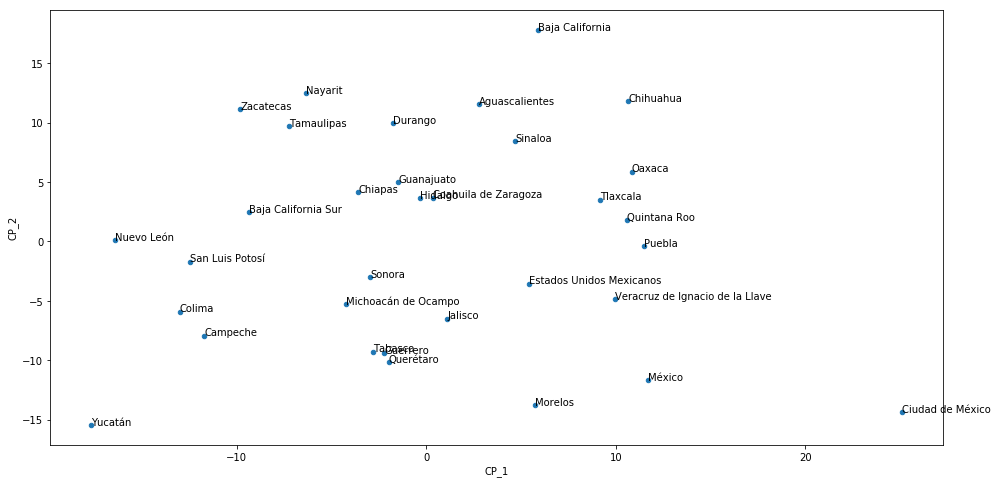

In [9]:
%matplotlib inline

ax = bienestar_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', figsize=(16,8))

for i, pais in enumerate(bienestar_pca_df.index):
    ax.annotate(pais, (bienestar_pca_df.iloc[i].CP_1, bienestar_pca_df.iloc[i].CP_2))

En general, cada vez que realicé un muestreo diferente, la primer componente principal explica la mayor parte de la variación, y por lo tanto la distribución de los paises a lo largo del eje `CP_1` explica mejor las diferencias entre paises.  

## Buscando similitudes entre paises usando las K-medias

Con el fin de encontrar un posible regrupamiento de los paises en casos representativos, vamos a utilizar el método de las K-medias. Un problema grande del uso del algoritmo de las K-medias es determinar el número correcto del regrupamientos, problema que en general hay que resolver a pulmón.

Para esto, vamos a utilizar una técnica semi automátizada llamada *el método del codo*, en la cuálse calcula las k-medias para K=2, 3, .., maxK, y luego se mide el costo de la solución con este número de clusters. Se espera que tiendan a 0 conforme K tiende al número de objetos, pero nos vamos a fijar en donde se encuentran algún punto de quiebre en la gráfica que nos indique que ese número de algomeraciones es correcto. Por supuesto es solo un criterio semiformal y el criterio subjetivo juega un papel importante.

El número máximo de clusters se determina por la aplicación que vamos a realizar. Por ejemplo, en este caso que queremos analisar 30 paises, más de 5 agrupaciones diferentes sería demasiado. 


Text(0.5,1,'Selección de K con el método del codo')

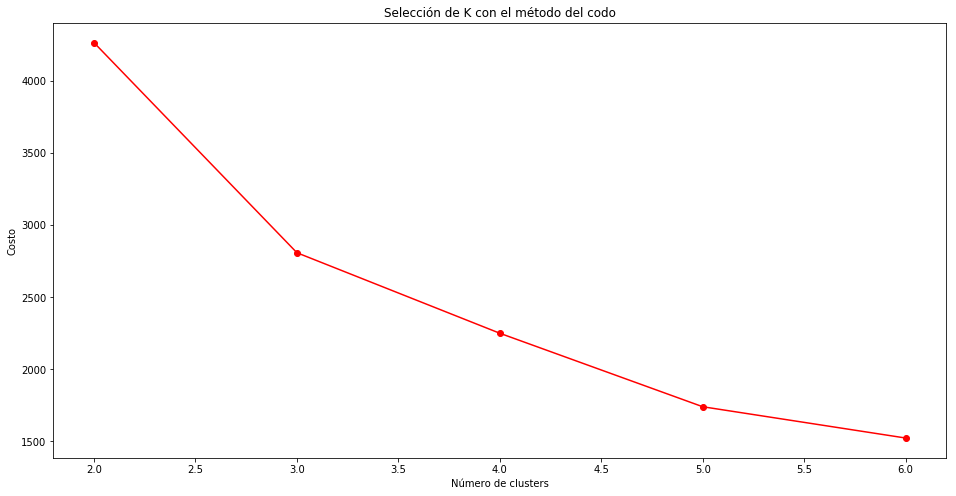

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

maxK = 6
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(bienestar_df)
    costos.append(-kmeans.score(bienestar_df))
    
plt.figure(figsize=(16,8))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K con el método del codo')


En el caso particular que yo tome (cada caso al repetirse es diferente) me encuentro con dos codos, uno en 3 y unos en 4, pero el de 4 es mas pronunciado, así que me quedo con ese.

#### Pregunta para contestar: ¿Cual fué el codo más pronunciado para tu caso particular?
**R. ** El codo más pronuciado fue 3.

Ahora agregamos los clusters obtenidos a los datos que ya habíamos reducido con PCA (par poder visualizarlos) y los graficamos de la misma manera.

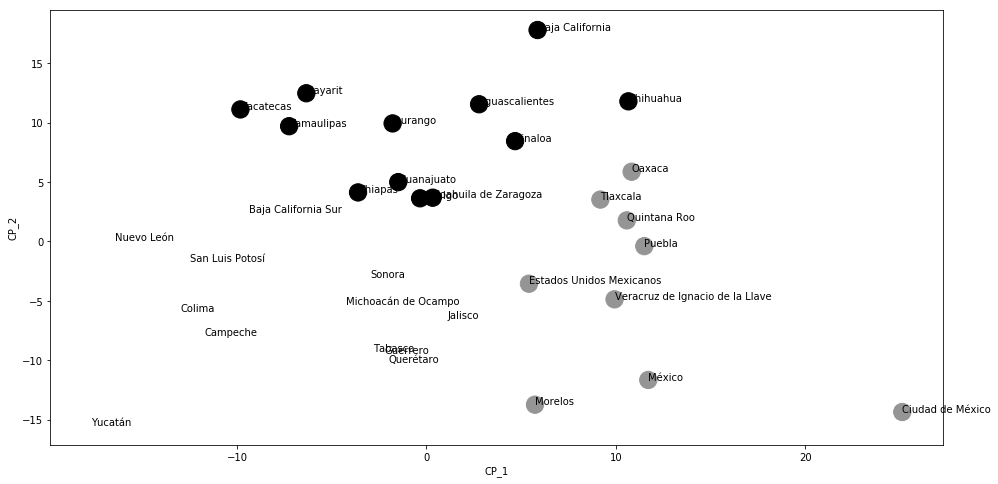

In [11]:
K = 3
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(bienestar_df)
bienestar_pca_df['grupos'] = pd.Series(clusters.labels_, index=bienestar_pca_df.index)


ax = bienestar_pca_df.plot(kind='scatter', x='CP_1', y='CP_2', 
                     c=bienestar_pca_df.grupos.astype(float),
                     figsize=(16,8), s=300)

for i, pais in enumerate(bienestar_pca_df.index):
    ax.annotate(pais, (bienestar_pca_df.iloc[i].CP_1, bienestar_pca_df.iloc[i].CP_2))


Muy bien. Ya tenemos un primer análisis. Sin embargo no tenemos una idea clara de que significan los clusters. Para eso vamos a analizar los prototipos de clases que tenemos, y los cuales están asociados con un conjunto de paises.

In [12]:
prototipos_df = pd.DataFrame(kmeans.cluster_centers_)
prototipos_df.index = ['P'+str(i + 1) for i in range(K)]
prototipos_df.columns = bienestar_df.columns
prototipos_df.index.names = ['Protopipo']
prototipos_df.columns.names = ['Indicadores']

prototipos_df

Indicadores,Participación cívica y política,Participación electoral,Confianza en la aplicación de la ley,Percepción de ausencia de corrupción en el sistema judicial,Percepción de confianza en los jueces
Protopipo,,,,,
P1,8.000000,57.641667,6.725000,33.283333,60.883333
P2,6.288889,44.566667,3.894444,23.844444,51.333333
P3,6.683333,41.316667,6.879167,36.250000,63.125000


Lo que es más fácil de analizar que 30 paises. Inclusive se pueden graficar en el tiempo y tiene sentido.

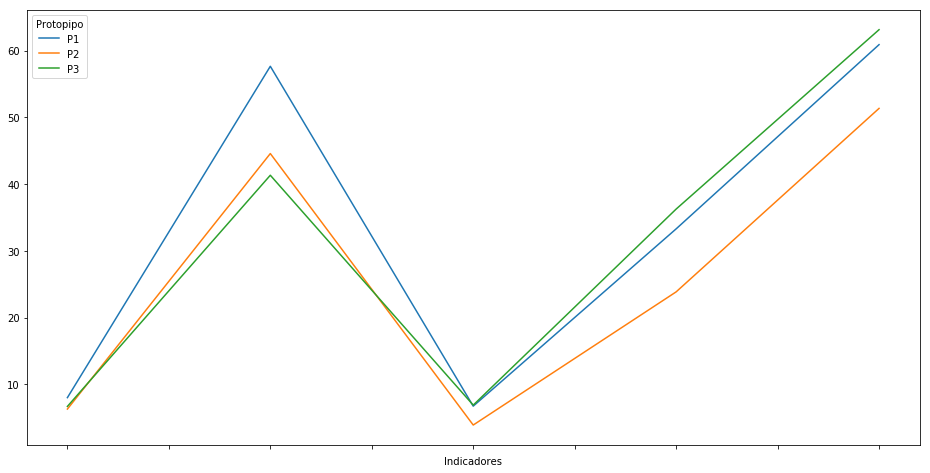

In [13]:
prototipos_df.T.plot(figsize=(16,8))

#### Pregunta para contestar: En función de las gráficas, da una explicación coherente a los diferentes prototipos y que puede significar (i.e. paises con mucha tuberculosis que van mejorando, paises que van empeorando en cuanto a casos de tuberculosis, paises que experimentaron un pico el año XXXX, etc...)
**R. ** 
- Podemos ver como los tres prototipos se comportan de manera similar, que los tres comparten los mismos cambios en los indicadores y que el minimo se encuentra en el mismo indicador.
- Tambien podemos ver que P3 es muy cercano a P2 iniciando la grafica, pero al ir avanzando estos se separan y P3 ahora se comienza a parecer mas a P1.
